In [5]:
!pip install kneed

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/Users/klnimri/Desktop/tsne_scores(1).csv")

In [72]:
#Q1.1 A:
#MinPts = 2 * (number of dimensions) = 2 * 2 = 4
MinPts = 2 * df.shape[1]

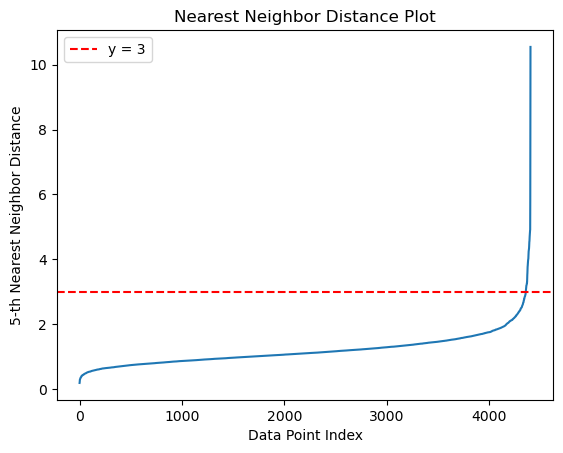

In [86]:
#Q1.1 B:
k = MinPts + 1

neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(df)

distances, _ = neigh.kneighbors(df)
sorted_distances = sorted(distances[:, -1]) 

plt.plot(range(len(sorted_distances)), sorted_distances)
plt.axhline(y=3, color='r', linestyle='--', label='y = 3')
plt.xlabel("Data Point Index")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title("Nearest Neighbor Distance Plot")
plt.legend()
plt.show()

optimal_eps = 14

In [74]:
#Q1.2
dbscan = DBSCAN(eps=optimal_eps, min_samples=MinPts)
clusters = dbscan.fit_predict(df)

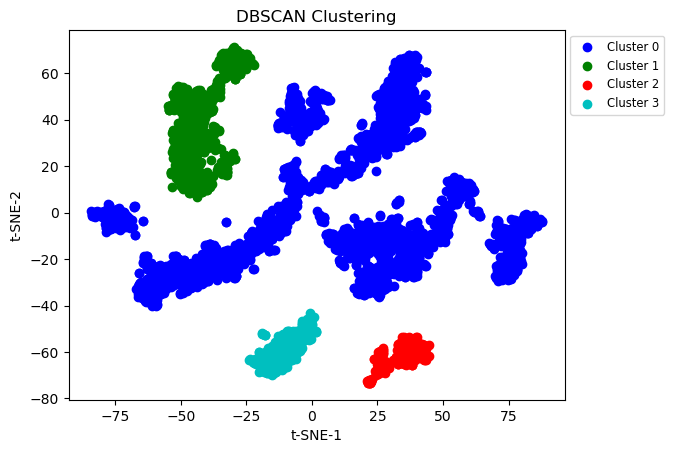

In [75]:
#Q1.3
distances, _ = neigh.kneighbors(df)

sorted_distances = sorted(distances[:, -1])

custom_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray']

for label in set(clusters):
    if label == -1:
        marker = 'x'
        color = 'gray' 
    else:
        marker = 'o'
        color = custom_colors[label % len(custom_colors)]

    x = df[clusters == label].iloc[:, 0]
    y = df[clusters == label].iloc[:, 1] 
    
    plt.scatter(x, y, c=color, label=f'Cluster {label}', marker=marker)

plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')
plt.title('DBSCAN Clustering')
plt.legend(fontsize='small', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

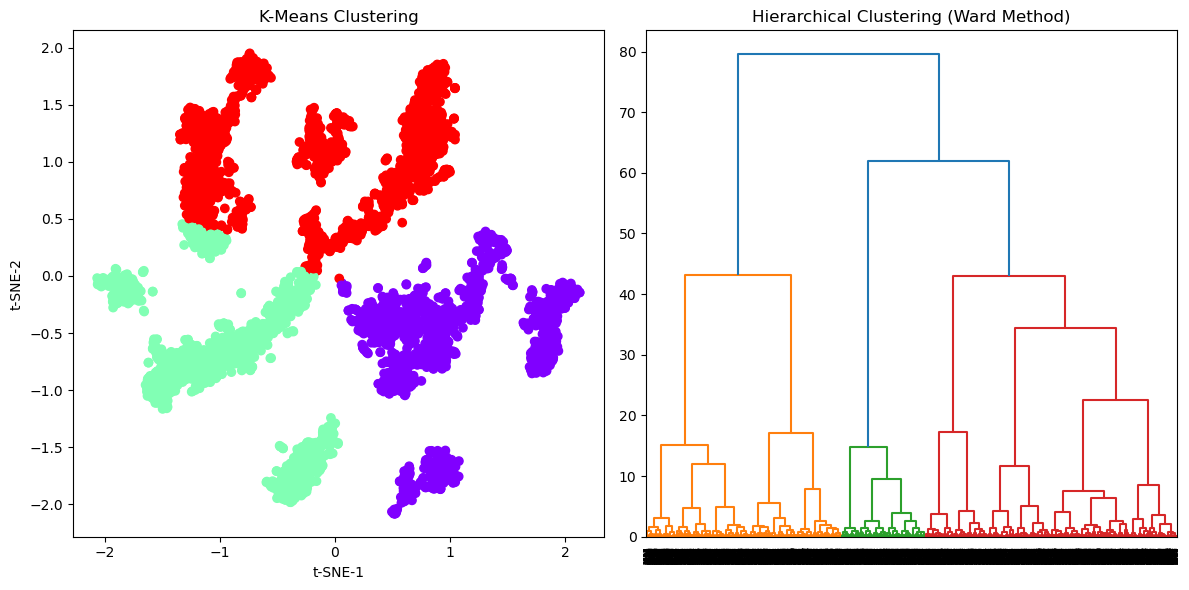

In [76]:
#Q2.1
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, n_init=10)
kmeans_labels = kmeans.fit_predict(df_standardized)

ward_clusters = AgglomerativeClustering(n_clusters=5, linkage='ward').fit_predict(df_standardized)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(df_standardized[:, 0], df_standardized[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')

plt.subplot(122)
linkage_matrix = linkage(df_standardized, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering (Ward Method)')

plt.tight_layout()
plt.show()

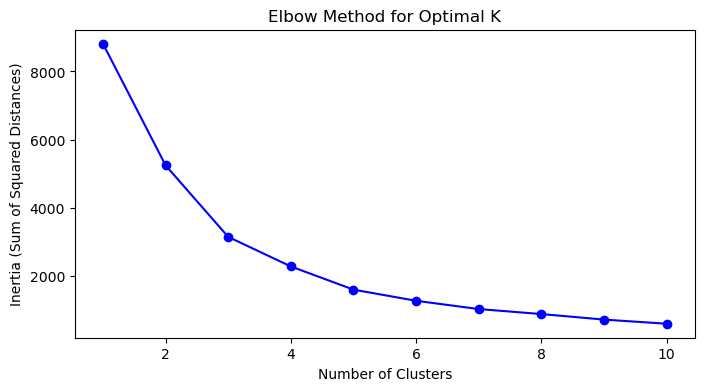

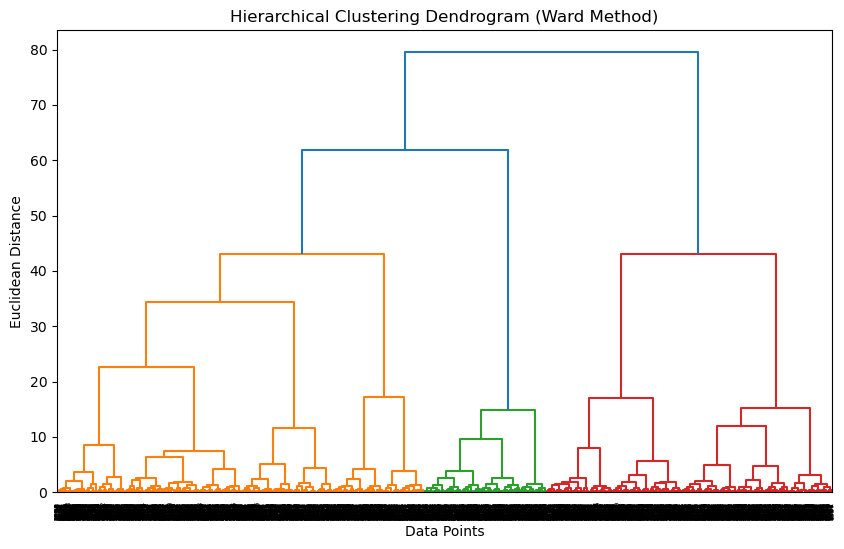

In [77]:
#Q2.2: 
# Step 1: Apply the elbow method for K-Means
inertia = []
for k in range(1, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_standardized)
    inertia.append(kmeans.inertia_)

# Plot the elbow method curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 2: Visualize the dendrogram for Hierarchical Clustering
linkage_matrix = linkage(df_standardized, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, orientation="top", labels=None, distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [83]:
#Q2.3
"""
The K-mean predicted that there is 3 classes 
The Hierarchical Clustering predicted that there is 3 classes 
The DBSCAN predicted that there is 4 classes using 
eps = 14 and minipts = 5
"""

'\nThe K-mean predicted that there is 3 classes \nThe Hierarchical Clustering predicted that there is 3 classes \nThe DBSCAN predicted that there is 4 classes using \neps = 14 and minipts = 5\n'

In [ ]:
#Student name: Khalid Nimri
#Student ID: 2140145